In [10]:
from glob import glob
from os import path

DIR_CKPTs = "..//..//CHECKPOINTS//E02_win_rate//"
checkpoint_files = glob(path.join(DIR_CKPTs, "*.pt"))
# checkpoint_files

In [11]:
from torch.nn.utils import parameters_to_vector
import torch
from tqdm import tqdm

diff_norm = []
diff_n_std = []
for idx_f, ckt_path in enumerate(tqdm(checkpoint_files, desc="Processing checkpoints")):
    model = torch.load(ckt_path)

    if idx_f == 0:
        all_params_prev = parameters_to_vector([w for w in model.values()])
        continue

    all_params = parameters_to_vector([w for w in model.values()])
    _d = all_params - all_params_prev
    diff_n_std.append(torch.std(_d).item())
    diff_norm.append(torch.norm(_d).item())

Processing checkpoints: 100%|██████████| 1015/1015 [00:01<00:00, 783.50it/s]


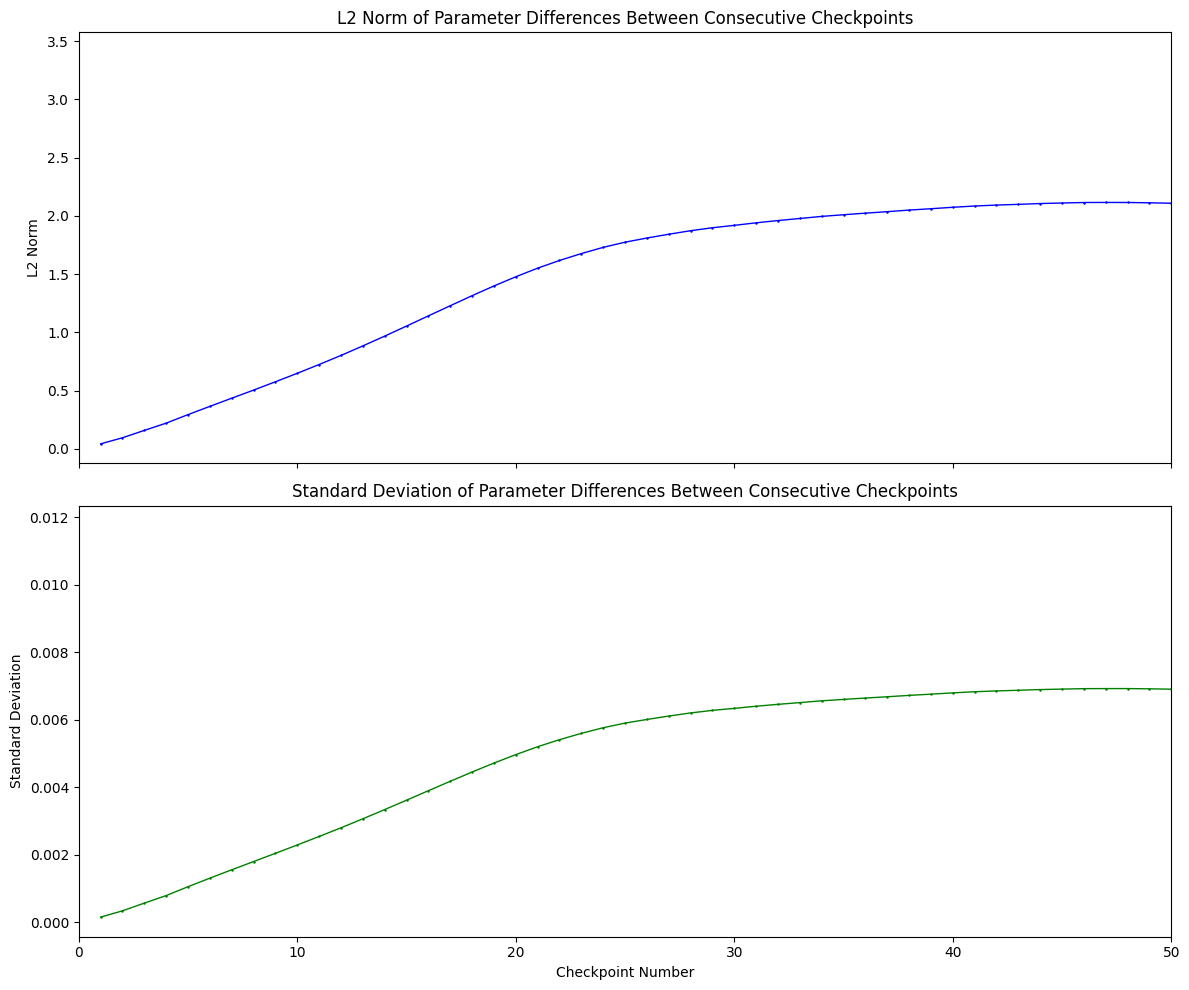

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Create a dataframe for better plotting with seaborn
data = pd.DataFrame(
    {"Checkpoint": range(1, len(diff_norm) + 1), "Norm": diff_norm, "Std": diff_n_std}
)

# Set the style for prettier plots
# sns.set_theme(style="whitegrid")

# Create a figure with two subplots
fig, axes = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Plot norm values
sns.lineplot(
    x="Checkpoint",
    y="Norm",
    data=data,
    ax=axes[0],
    marker=".",
    markersize=2,
    color="blue",
    linewidth=1,
    # markerfacecolor="white",  # White fill for better visibility
    markeredgecolor="blue",
)
axes[0].set_title("L2 Norm of Parameter Differences Between Consecutive Checkpoints")
axes[0].set_ylabel("L2 Norm")

# Plot standard deviation values
sns.lineplot(
    x="Checkpoint",
    y="Std",
    data=data,
    ax=axes[1],
    marker=".",
    markersize=2,
    color="green",
    linewidth=1,
    # markerfacecolor="white",  # White fill for better visibility
    markeredgecolor="green",
)
axes[1].set_title(
    "Standard Deviation of Parameter Differences Between Consecutive Checkpoints"
)
axes[1].set_ylabel("Standard Deviation")
axes[1].set_xlabel("Checkpoint Number")

# Adjust layout
lim_low = 0
lim = 50
axes[0].set_xlim(lim_low, lim)
axes[1].set_xlim(lim_low, lim)
plt.tight_layout()
plt.show()

In [13]:
37_000 / 11
# 48_000 / 11

3363.6363636363635

In [19]:
from plotly.subplots import make_subplots

import plotly.graph_objects as go

# Create subplots with 2 rows
fig = make_subplots(
    rows=2,
    cols=1,
    subplot_titles=(
        "L2 Norm of Parameter Differences Between Consecutive Checkpoints",
        "Standard Deviation of Parameter Differences Between Consecutive Checkpoints",
    ),
    vertical_spacing=0.1,
)

# Add L2 Norm trace
fig.add_trace(
    go.Scatter(
        x=data["Checkpoint"],
        y=data["Norm"],
        mode="lines+markers",
        name="L2 Norm",
        line=dict(color="blue", width=1),
        marker=dict(size=3, color="blue"),
    ),
    row=1,
    col=1,
)

# Add Standard Deviation trace
fig.add_trace(
    go.Scatter(
        x=data["Checkpoint"],
        y=data["Std"],
        mode="lines+markers",
        name="Std Dev",
        line=dict(color="green", width=1),
        marker=dict(size=3, color="green"),
    ),
    row=2,
    col=1,
)

# Update layout
lim = 200
# fig.update_xaxes(title_text="Checkpoint Number", range=[lim_low, lim], row=2, col=1)
# fig.update_xaxes(range=[lim_low, lim], row=1, col=1)
fig.update_yaxes(title_text="L2 Norm", row=1, col=1)
fig.update_yaxes(title_text="Standard Deviation", row=2, col=1)

fig.update_layout(
    height=800,
    showlegend=False,
    title_text="Parameter Differences Between Consecutive Checkpoints",
)

fig.show()

In [21]:
LR = [
    9.999999022909196e-05,
    9.999996091637172e-05,
    9.999991206185081e-05,
    9.999984366554856e-05,
    9.999975572749197e-05,
    9.999964824771572e-05,
    9.999952122626228e-05,
    9.999937466318178e-05,
    9.999920855853207e-05,
    9.999902291237876e-05,
    9.999881772479512e-05,
    9.999859299586214e-05,
    9.999834872566854e-05,
    9.999808491431077e-05,
    9.999780156189298e-05,
    9.999749866852702e-05,
    9.999717623433249e-05,
    9.999683425943666e-05,
    9.999647274397455e-05,
    9.999609168808887e-05,
    9.999569109193006e-05,
    9.999527095565625e-05,
    9.999483127943333e-05,
    9.999437206343486e-05,
    9.999389330784216e-05,
    9.99933950128442e-05,
    9.999287717863772e-05,
    9.999233980542715e-05,
    9.999178289342462e-05,
    9.999120644285e-05,
    9.999061045393086e-05,
    9.998999492690251e-05,
    9.998935986200793e-05,
    9.998870525949785e-05,
    9.998803111963067e-05,
    9.998733744267254e-05,
    9.998662422889732e-05,
    9.998589147858657e-05,
    9.998513919202958e-05,
    9.998436736952332e-05,
    9.99835760113725e-05,
    9.998276511788954e-05,
    9.998193468939457e-05,
    9.998108472621544e-05,
    9.998021522868767e-05,
    9.997932619715456e-05,
    9.997841763196704e-05,
    9.997748953348385e-05,
    9.997654190207137e-05,
    9.997557473810368e-05,
    9.997458804196265e-05,
    9.997358181403777e-05,
    9.997255605472631e-05,
    9.99715107644332e-05,
    9.997044594357114e-05,
    9.996936159256048e-05,
    9.996825771182928e-05,
    9.996713430181339e-05,
    9.996599136295628e-05,
    9.996482889570917e-05,
    9.996364690053098e-05,
    9.996244537788834e-05,
    9.996122432825561e-05,
    9.995998375211481e-05,
    9.995872364995573e-05,
    9.995744402227583e-05,
    9.99561448695803e-05,
    9.995482619238199e-05,
    9.995348799120152e-05,
    9.995213026656718e-05,
    9.995075301901497e-05,
    9.994935624908863e-05,
    9.994793995733957e-05,
    9.994650414432692e-05,
    9.994504881061751e-05,
    9.994357395678588e-05,
    9.994207958341431e-05,
    9.994056569109272e-05,
    9.993903228041878e-05,
    9.993747935199786e-05,
    9.993590690644302e-05,
    9.993431494437506e-05,
    9.993270346642245e-05,
    9.993107247322136e-05,
    9.992942196541569e-05,
    9.992775194365706e-05,
    9.992606240860475e-05,
    9.992435336092575e-05,
    9.992262480129476e-05,
    9.992087673039422e-05,
    9.991910914891422e-05,
    9.991732205755257e-05,
    9.991551545701481e-05,
    9.991368934801411e-05,
    9.991184373127143e-05,
    9.990997860751537e-05,
    9.990809397748227e-05,
    9.990618984191613e-05,
    9.990426620156871e-05,
    9.990232305719938e-05,
    9.990036040957529e-05,
    9.989837825947126e-05,
    9.989637660766983e-05,
    9.98943554549612e-05,
    9.989231480214331e-05,
    9.989025465002173e-05,
    9.988817499940981e-05,
    9.988607585112856e-05,
    9.98839572060067e-05,
    9.98818190648806e-05,
    9.987966142859441e-05,
    9.987748429799992e-05,
    9.987528767395658e-05,
    9.987307155733164e-05,
    9.987083594899998e-05,
    9.986858084984416e-05,
    9.986630626075446e-05,
    9.986401218262888e-05,
    9.986169861637306e-05,
    9.985936556290034e-05,
    9.985701302313181e-05,
    9.985464099799621e-05,
    9.985224948842998e-05,
    9.984983849537723e-05,
    9.98474080197898e-05,
    9.984495806262719e-05,
    9.984248862485661e-05,
    9.983999970745295e-05,
    9.98374913113988e-05,
    9.983496343768444e-05,
    9.983241608730784e-05,
    9.982984926127464e-05,
    9.982726296059817e-05,
    9.982465718629948e-05,
    9.982203193940728e-05,
    9.981938722095799e-05,
    9.981672303199569e-05,
    9.981403937357218e-05,
    9.98113362467469e-05,
    9.9808613652587e-05,
    9.980587159216733e-05,
    9.980311006657041e-05,
    9.980032907688645e-05,
    9.979752862421335e-05,
    9.979470870965665e-05,
    9.979186933432963e-05,
    9.978901049935325e-05,
    9.97861322058561e-05,
    9.97832344549745e-05,
    9.978031724785243e-05,
    9.977738058564156e-05,
    9.977442446950124e-05,
    9.977144890059849e-05,
    9.976845388010803e-05,
    9.976543940921224e-05,
    9.976240548910117e-05,
    9.97593521209726e-05,
    9.975627930603191e-05,
    9.975318704549225e-05,
    9.975007534057434e-05,
    9.974694419250665e-05,
    9.974379360252533e-05,
    9.974062357187415e-05,
    9.973743410180462e-05,
    9.973422519357587e-05,
    9.973099684845474e-05,
    9.972774906771572e-05,
    9.9724481852641e-05,
    9.972119520452038e-05,
    9.971788912465143e-05,
    9.971456361433931e-05,
    9.971121867489688e-05,
    9.970785430764469e-05,
    9.970447051391089e-05,
    9.97010672950314e-05,
    9.969764465234974e-05,
    9.969420258721709e-05,
    9.969074110099236e-05,
    9.968726019504208e-05,
    9.968375987074043e-05,
    9.968024012946931e-05,
    9.967670097261826e-05,
    9.967314240158447e-05,
    9.966956441777281e-05,
    9.966596702259582e-05,
    9.96623502174737e-05,
    9.965871400383427e-05,
    9.965505838311309e-05,
    9.965138335675332e-05,
    9.964768892620581e-05,
    9.964397509292906e-05,
    9.964024185838925e-05,
    9.963648922406017e-05,
    9.96327171914233e-05,
    9.962892576196782e-05,
    9.96251149371905e-05,
    9.962128471859577e-05,
    9.961743510769578e-05,
    9.961356610601028e-05,
    9.96096777150667e-05,
    9.960576993640007e-05,
    9.960184277155318e-05,
    9.959789622207639e-05,
    9.959393028952772e-05,
    9.958994497547288e-05,
    9.958594028148519e-05,
    9.958191620914566e-05,
    9.95778727600429e-05,
    9.957380993577324e-05,
    9.95697277379406e-05,
    9.956562616815654e-05,
    9.956150522804034e-05,
    9.955736491921885e-05,
    9.955320524332661e-05,
    9.954902620200578e-05,
    9.954482779690621e-05,
    9.954061002968533e-05,
    9.953637290200828e-05,
    9.953211641554778e-05,
    9.952784057198425e-05,
    9.952354537300571e-05,
    9.951923082030783e-05,
    9.951489691559394e-05,
    9.951054366057502e-05,
    9.95061710569696e-05,
    9.950177910650398e-05,
    9.949736781091202e-05,
    9.94929371719352e-05,
    9.948848719132268e-05,
    9.948401787083124e-05,
    9.947952921222531e-05,
    9.947502121727694e-05,
    9.947049388776579e-05,
    9.94659472254792e-05,
    9.946138123221213e-05,
    9.945679590976715e-05,
    9.945219125995447e-05,
    9.944756728459191e-05,
    9.944292398550498e-05,
    9.943826136452677e-05,
    9.943357942349801e-05,
    9.942887816426705e-05,
    9.942415758868985e-05,
    9.941941769863006e-05,
    9.941465849595891e-05,
    9.940987998255522e-05,
    9.940508216030551e-05,
    9.940026503110388e-05,
    9.939542859685204e-05,
    9.939057285945934e-05,
    9.938569782084275e-05,
    9.938080348292685e-05,
    9.937588984764387e-05,
    9.937095691693362e-05,
    9.936600469274356e-05,
    9.936103317702874e-05,
    9.935604237175182e-05,
    9.93510322788831e-05,
    9.93460029004005e-05,
    9.934095423828951e-05,
    9.933588629454327e-05,
    9.933079907116254e-05,
    9.932569257015567e-05,
    9.932056679353862e-05,
    9.931542174333498e-05,
    9.93102574215759e-05,
    9.930507383030022e-05,
    9.92998709715543e-05,
    9.929464884739217e-05,
    9.928940745987543e-05,
    9.92841468110733e-05,
    9.927886690306262e-05,
    9.927356773792777e-05,
    9.926824931776081e-05,
    9.926291164466134e-05,
    9.925755472073663e-05,
    9.925217854810148e-05,
    9.924678312887832e-05,
    9.924136846519718e-05,
    9.923593455919569e-05,
    9.923048141301906e-05,
    9.922500902882012e-05,
    9.921951740875927e-05,
    9.92140065550045e-05,
    9.920847646973143e-05,
    9.920292715512325e-05,
    9.919735861337072e-05,
    9.919177084667224e-05,
    9.918616385723375e-05,
    9.918053764726882e-05,
    9.917489221899858e-05,
    9.916922757465174e-05,
    9.916354371646463e-05,
    9.915784064668114e-05,
    9.915211836755275e-05,
    9.914637688133854e-05,
    9.914061619030515e-05,
    9.91348362967268e-05,
    9.912903720288531e-05,
    9.912321891107008e-05,
    9.911738142357804e-05,
    9.911152474271379e-05,
    9.910564887078942e-05,
    9.909975381012465e-05,
    9.909383956304675e-05,
    9.908790613189056e-05,
    9.90819535189985e-05,
    9.907598172672058e-05,
    9.906999075741437e-05,
    9.9063980613445e-05,
    9.905795129718523e-05,
    9.905190281101527e-05,
    9.9045835157323e-05,
    9.903974833850382e-05,
    9.903364235696073e-05,
    9.902751721510425e-05,
    9.902137291535251e-05,
    9.901520946013117e-05,
    9.900902685187345e-05,
    9.900282509302018e-05,
    9.89966041860197e-05,
    9.899036413332793e-05,
    9.898410493740833e-05,
    9.897782660073195e-05,
    9.897152912577737e-05,
    9.896521251503072e-05,
    9.895887677098571e-05,
    9.895252189614361e-05,
    9.894614789301318e-05,
    9.893975476411083e-05,
    9.893334251196043e-05,
    9.892691113909343e-05,
    9.892046064804885e-05,
    9.891399104137323e-05,
    9.89075023216207e-05,
    9.890099449135287e-05,
    9.889446755313894e-05,
    9.888792150955562e-05,
    9.888135636318723e-05,
    9.887477211662553e-05,
    9.886816877246993e-05,
    9.886154633332731e-05,
    9.885490480181209e-05,
    9.884824418054624e-05,
    9.884156447215928e-05,
    9.883486567928825e-05,
    9.882814780457771e-05,
    9.882141085067982e-05,
    9.881465482025417e-05,
    9.880787971596795e-05,
    9.880108554049587e-05,
    9.879427229652017e-05,
    9.878743998673059e-05,
    9.878058861382444e-05,
    9.877371818050652e-05,
    9.876682868948916e-05,
    9.875992014349224e-05,
    9.875299254524314e-05,
    9.874604589747676e-05,
    9.873908020293554e-05,
    9.873209546436939e-05,
    9.872509168453582e-05,
    9.871806886619978e-05,
    9.871102701213378e-05,
    9.870396612511782e-05,
    9.869688620793945e-05,
    9.868978726339371e-05,
    9.868266929428312e-05,
    9.867553230341777e-05,
    9.866837629361522e-05,
    9.866120126770054e-05,
    9.865400722850632e-05,
    9.864679417887268e-05,
    9.863956212164719e-05,
    9.863231105968494e-05,
    9.862504099584856e-05,
    9.861775193300816e-05,
    9.861044387404133e-05,
    9.860311682183319e-05,
    9.859577077927632e-05,
    9.858840574927084e-05,
    9.858102173472433e-05,
    9.857361873855191e-05,
    9.856619676367614e-05,
    9.855875581302713e-05,
    9.855129588954241e-05,
    9.854381699616706e-05,
    9.853631913585364e-05,
    9.852880231156216e-05,
    9.852126652626016e-05,
    9.851371178292265e-05,
    9.850613808453211e-05,
    9.849854543407855e-05,
    9.849093383455939e-05,
    9.848330328897957e-05,
    9.847565380035153e-05,
    9.846798537169516e-05,
    9.846029800603783e-05,
    9.84525917064144e-05,
    9.844486647586718e-05,
    9.843712231744597e-05,
    9.842935923420804e-05,
    9.842157722921816e-05,
    9.84137763055485e-05,
    9.840595646627877e-05,
    9.839811771449611e-05,
    9.839026005329514e-05,
    9.838238348577794e-05,
    9.837448801505404e-05,
    9.836657364424047e-05,
    9.835864037646167e-05,
    9.83506882148496e-05,
    9.834271716254363e-05,
    9.833472722269059e-05,
    9.832671839844482e-05,
    9.831869069296805e-05,
    9.831064410942947e-05,
    9.83025786510058e-05,
    9.829449432088112e-05,
    9.8286391122247e-05,
    9.827826905830246e-05,
    9.827012813225396e-05,
    9.826196834731539e-05,
    9.825378970670813e-05,
    9.824559221366096e-05,
    9.823737587141013e-05,
    9.822914068319933e-05,
    9.822088665227965e-05,
    9.82126137819097e-05,
    9.820432207535544e-05,
    9.81960115358903e-05,
    9.818768216679519e-05,
    9.817933397135838e-05,
    9.81709669528756e-05,
    9.816258111465005e-05,
    9.81541764599923e-05,
    9.814575299222036e-05,
    9.813731071465973e-05,
    9.812884963064324e-05,
    9.812036974351121e-05,
    9.811187105661137e-05,
    9.810335357329887e-05,
    9.809481729693628e-05,
    9.808626223089357e-05,
    9.807768837854814e-05,
    9.806909574328481e-05,
    9.806048432849585e-05,
    9.80518541375809e-05,
    9.8043205173947e-05,
    9.803453744100864e-05,
    9.80258509421877e-05,
    9.801714568091348e-05,
    9.800842166062265e-05,
    9.799967888475934e-05,
    9.799091735677507e-05,
    9.798213708012874e-05,
    9.797333805828665e-05,
    9.796452029472255e-05,
    9.79556837929175e-05,
    9.794682855636006e-05,
    9.793795458854613e-05,
    9.792906189297897e-05,
    9.792015047316934e-05,
    9.791122033263527e-05,
    9.790227147490226e-05,
    9.789330390350319e-05,
    9.788431762197829e-05,
    9.787531263387523e-05,
    9.786628894274901e-05,
    9.785724655216208e-05,
    9.784818546568418e-05,
    9.783910568689252e-05,
    9.783000721937163e-05,
    9.782089006671344e-05,
    9.781175423251729e-05,
    9.780259972038985e-05,
    9.779342653394516e-05,
    9.778423467680465e-05,
    9.777502415259714e-05,
    9.77657949649588e-05,
    9.775654711753313e-05,
    9.774728061397106e-05,
    9.773799545793086e-05,
    9.772869165307816e-05,
    9.771936920308595e-05,
    9.771002811163459e-05,
    9.77006683824118e-05,
    9.769129001911263e-05,
    9.768189302543954e-05,
    9.76724774051023e-05,
    9.766304316181804e-05,
    9.765359029931126e-05,
    9.764411882131379e-05,
    9.763462873156485e-05,
    9.762512003381094e-05,
    9.761559273180596e-05,
    9.760604682931115e-05,
    9.759648233009507e-05,
    9.758689923793361e-05,
    9.757729755661007e-05,
    9.756767728991498e-05,
    9.755803844164633e-05,
    9.754838101560934e-05,
    9.753870501561663e-05,
    9.752901044548815e-05,
    9.751929730905114e-05,
    9.750956561014019e-05,
    9.749981535259722e-05,
    9.749004654027148e-05,
    9.748025917701955e-05,
    9.747045326670531e-05,
    9.746062881319999e-05,
    9.745078582038212e-05,
    9.744092429213758e-05,
    9.743104423235952e-05,
    9.742114564494845e-05,
    9.741122853381217e-05,
    9.740129290286578e-05,
    9.739133875603173e-05,
    9.738136609723976e-05,
    9.737137493042692e-05,
    9.736136525953756e-05,
    9.735133708852331e-05,
    9.734129042134319e-05,
    9.733122526196341e-05,
    9.732114161435758e-05,
    9.731103948250653e-05,
    9.730091887039844e-05,
    9.729077978202877e-05,
    9.728062222140026e-05,
    9.727044619252296e-05,
    9.726025169941421e-05,
    9.725003874609863e-05,
    9.723980733660814e-05,
    9.722955747498191e-05,
    9.721928916526643e-05,
    9.72090024115155e-05,
    9.719869721779013e-05,
    9.718837358815868e-05,
    9.717803152669672e-05,
    9.716767103748716e-05,
    9.715729212462015e-05,
    9.714689479219313e-05,
    9.713647904431078e-05,
    9.712604488508507e-05,
    9.711559231863527e-05,
    9.710512134908787e-05,
    9.709463198057662e-05,
    9.70841242172426e-05,
    9.707359806323409e-05,
    9.706305352270664e-05,
    9.705249059982309e-05,
    9.704190929875349e-05,
    9.703130962367518e-05,
    9.702069157877275e-05,
    9.701005516823803e-05,
    9.69994003962701e-05,
    9.698872726707531e-05,
    9.697803578486722e-05,
    9.696732595386669e-05,
    9.695659777830176e-05,
    9.694585126240776e-05,
    9.693508641042725e-05,
    9.692430322661001e-05,
    9.691350171521309e-05,
    9.690268188050074e-05,
    9.689184372674444e-05,
    9.688098725822295e-05,
    9.687011247922222e-05,
    9.685921939403545e-05,
    9.684830800696305e-05,
    9.683737832231268e-05,
    9.682643034439917e-05,
    9.681546407754464e-05,
    9.680447952607838e-05,
    9.679347669433692e-05,
    9.678245558666403e-05,
    9.677141620741062e-05,
    9.676035856093489e-05,
    9.674928265160224e-05,
    9.673818848378523e-05,
    9.672707606186369e-05,
    9.67159453902246e-05,
    9.67047964732622e-05,
    9.669362931537789e-05,
    9.66824439209803e-05,
    9.667124029448525e-05,
    9.666001844031572e-05,
    9.664877836290196e-05,
    9.663752006668136e-05,
    9.662624355609851e-05,
    9.661494883560521e-05,
    9.660363590966042e-05,
    9.659230478273032e-05,
    9.658095545928823e-05,
    9.656958794381473e-05,
    9.65582022407975e-05,
    9.654679835473145e-05,
    9.653537629011866e-05,
    9.652393605146836e-05,
    9.651247764329698e-05,
    9.650100107012813e-05,
    9.648950633649257e-05,
    9.647799344692826e-05,
    9.646646240598027e-05,
    9.645491321820088e-05,
    9.644334588814954e-05,
    9.643176042039286e-05,
    9.642015681950458e-05,
    9.640853509006563e-05,
    9.639689523666407e-05,
    9.638523726389514e-05,
    9.637356117636122e-05,
    9.636186697867183e-05,
    9.63501546754437e-05,
    9.63384242713006e-05,
    9.632667577087356e-05,
    9.631490917880067e-05,
    9.630312449972722e-05,
    9.629132173830557e-05,
    9.627950089919531e-05,
    9.62676619870631e-05,
    9.625580500658276e-05,
    9.624392996243523e-05,
    9.62320368593086e-05,
    9.622012570189807e-05,
    9.620819649490597e-05,
    9.619624924304177e-05,
    9.618428395102208e-05,
    9.617230062357057e-05,
    9.616029926541808e-05,
    9.614827988130258e-05,
    9.61362424759691e-05,
    9.612418705416985e-05,
    9.611211362066408e-05,
    9.610002218021821e-05,
    9.608791273760574e-05,
    9.60757852976073e-05,
    9.60636398650106e-05,
    9.605147644461048e-05,
    9.603929504120885e-05,
    9.602709565961474e-05,
    9.601487830464428e-05,
    9.600264298112068e-05,
    9.599038969387424e-05,
    9.597811844774239e-05,
    9.596582924756961e-05,
    9.595352209820749e-05,
    9.594119700451468e-05,
    9.592885397135693e-05,
    9.591649300360712e-05,
    9.590411410614511e-05,
    9.589171728385793e-05,
    9.587930254163962e-05,
    9.586686988439133e-05,
    9.58544193170213e-05,
    9.584195084444477e-05,
    9.582946447158414e-05,
    9.581696020336881e-05,
    9.580443804473528e-05,
    9.57918980006271e-05,
    9.577934007599486e-05,
    9.576676427579627e-05,
    9.575417060499602e-05,
    9.57415590685659e-05,
    9.572892967148475e-05,
    9.571628241873845e-05,
    9.570361731531994e-05,
    9.569093436622919e-05,
    9.567823357647327e-05,
    9.566551495106619e-05,
    9.56527784950291e-05,
    9.564002421339015e-05,
    9.56272521111845e-05,
    9.56144621934544e-05,
    9.560165446524912e-05,
    9.558882893162491e-05,
    9.557598559764512e-05,
    9.556312446838008e-05,
    9.555024554890715e-05,
    9.553734884431074e-05,
    9.552443435968227e-05,
    9.551150210012016e-05,
    9.549855207072987e-05,
    9.548558427662387e-05,
    9.54725987229216e-05,
    9.54595954147496e-05,
    9.544657435724137e-05,
    9.543353555553738e-05,
    9.542047901478517e-05,
    9.540740474013925e-05,
    9.539431273676112e-05,
    9.538120300981931e-05,
    9.536807556448934e-05,
    9.535493040595372e-05,
    9.534176753940193e-05,
    9.532858697003046e-05,
    9.531538870304282e-05,
    9.530217274364948e-05,
    9.528893909706784e-05,
    9.527568776852236e-05,
    9.52624187632445e-05,
    9.524913208647257e-05,
    9.5235827743452e-05,
    9.522250573943512e-05,
    9.520916607968122e-05,
    9.519580876945661e-05,
    9.518243381403457e-05,
    9.516904121869528e-05,
    9.515563098872593e-05,
    9.514220312942069e-05,
    9.512875764608064e-05,
    9.511529454401387e-05,
    9.510181382853536e-05,
    9.508831550496712e-05,
    9.507479957863806e-05,
    9.506126605488405e-05,
    9.50477149390479e-05,
    9.503414623647941e-05,
    9.502055995253528e-05,
    9.500695609257914e-05,
    9.499333466198157e-05,
    9.497969566612014e-05,
    9.496603911037928e-05,
    9.495236500015037e-05,
    9.493867334083176e-05,
    9.492496413782868e-05,
    9.491123739655333e-05,
    9.489749312242478e-05,
    9.488373132086908e-05,
    9.486995199731914e-05,
    9.485615515721485e-05,
    9.484234080600296e-05,
    9.482850894913718e-05,
    9.481465959207809e-05,
    9.48007927402932e-05,
    9.478690839925692e-05,
    9.477300657445059e-05,
    9.47590872713624e-05,
    9.474515049548747e-05,
    9.473119625232785e-05,
    9.471722454739243e-05,
    9.470323538619703e-05,
    9.468922877426434e-05,
    9.467520471712396e-05,
    9.466116322031235e-05,
    9.464710428937289e-05,
    9.46330279298558e-05,
    9.461893414731822e-05,
    9.460482294732414e-05,
    9.459069433544447e-05,
    9.457654831725691e-05,
    9.456238489834611e-05,
    9.454820408430359e-05,
    9.453400588072768e-05,
    9.45197902932236e-05,
    9.450555732740346e-05,
    9.44913069888862e-05,
    9.447703928329763e-05,
    9.446275421627042e-05,
    9.444845179344406e-05,
    9.443413202046495e-05,
    9.44197949029863e-05,
    9.440544044666818e-05,
    9.43910686571775e-05,
    9.4376679540188e-05,
    9.436227310138031e-05,
    9.434784934644185e-05,
    9.433340828106687e-05,
    9.431894991095648e-05,
    9.430447424181864e-05,
    9.42899812793681e-05,
    9.427547102932644e-05,
    9.426094349742209e-05,
    9.424639868939028e-05,
    9.423183661097307e-05,
    9.421725726791935e-05,
    9.420266066598481e-05,
    9.418804681093196e-05,
    9.417341570853013e-05,
    9.415876736455542e-05,
    9.414410178479079e-05,
    9.412941897502594e-05,
    9.411471894105744e-05,
    9.410000168868863e-05,
    9.408526722372964e-05,
    9.407051555199741e-05,
    9.405574667931566e-05,
    9.404096061151491e-05,
    9.402615735443247e-05,
    9.401133691391244e-05,
    9.399649929580567e-05,
    9.398164450596983e-05,
    9.396677255026936e-05,
    9.395188343457548e-05,
    9.393697716476614e-05,
    9.392205374672614e-05,
    9.3907113186347e-05,
    9.389215548952699e-05,
    9.38771806621712e-05,
    9.386218871019145e-05,
    9.384717963950633e-05,
    9.383215345604115e-05,
    9.381711016572805e-05,
    9.380204977450587e-05,
    9.37869722883202e-05,
    9.377187771312341e-05,
    9.37567660548746e-05,
    9.37416373195396e-05,
    9.3726491513091e-05,
    9.371132864150813e-05,
    9.369614871077704e-05,
    9.368095172689055e-05,
    9.366573769584815e-05,
    9.365050662365614e-05,
    9.363525851632748e-05,
    9.361999337988189e-05,
    9.360471122034581e-05,
    9.358941204375238e-05,
    9.357409585614147e-05,
    9.355876266355968e-05,
    9.354341247206033e-05,
    9.352804528770339e-05,
    9.351266111655562e-05,
    9.349725996469043e-05,
    9.348184183818794e-05,
    9.3466406743135e-05,
    9.345095468562512e-05,
    9.343548567175855e-05,
    9.341999970764221e-05,
    9.34044967993897e-05,
    9.338897695312133e-05,
    9.33734401749641e-05,
    9.335788647105167e-05,
    9.334231584752439e-05,
    9.332672831052931e-05,
    9.331112386622014e-05,
    9.329550252075725e-05,
    9.327986428030774e-05,
    9.326420915104529e-05,
    9.324853713915034e-05,
    9.323284825080992e-05,
    9.321714249221777e-05,
    9.320141986957427e-05,
    9.318568038908647e-05,
    9.316992405696807e-05,
    9.31541508794394e-05,
    9.313836086272749e-05,
    9.312255401306597e-05,
    9.310673033669513e-05,
    9.309088983986192e-05,
    9.30750325288199e-05,
    9.30591584098293e-05,
    9.304326748915697e-05,
    9.30273597730764e-05,
    9.30114352678677e-05,
    9.299549397981758e-05,
    9.297953591521946e-05,
    9.29635610803733e-05,
    9.294756948158571e-05,
    9.293156112516994e-05,
    9.291553601744582e-05,
    9.28994941647398e-05,
    9.288343557338496e-05,
    9.2867360249721e-05,
    9.285126820009418e-05,
    9.283515943085738e-05,
    9.281903394837011e-05,
    9.280289175899843e-05,
    9.278673286911503e-05,
    9.277055728509919e-05,
    9.275436501333678e-05,
    9.273815606022023e-05,
    9.272193043214859e-05,
    9.270568813552747e-05,
    9.268942917676911e-05,
    9.267315356229226e-05,
    9.265686129852226e-05,
    9.264055239189108e-05,
    9.262422684883717e-05,
    9.260788467580564e-05,
    9.259152587924809e-05,
    9.257515046562272e-05,
    9.25587584413943e-05,
    9.254234981303411e-05,
    9.252592458702005e-05,
    9.250948276983652e-05,
    9.249302436797449e-05,
    9.247654938793148e-05,
    9.246005783621156e-05,
    9.244354971932531e-05,
    9.24270250437899e-05,
    9.2410483816129e-05,
    9.239392604287283e-05,
    9.237735173055813e-05,
    9.236076088572817e-05,
    9.234415351493275e-05,
    9.23275296247282e-05,
    9.23108892216774e-05,
    9.229423231234968e-05,
    9.227755890332093e-05,
    9.226086900117357e-05,
    9.224416261249649e-05,
    9.22274397438851e-05,
    9.221070040194133e-05,
    9.219394459327361e-05,
    9.217717232449688e-05,
    9.216038360223256e-05,
    9.214357843310856e-05,
    9.212675682375931e-05,
    9.21099187808257e-05,
    9.209306431095512e-05,
    9.207619342080146e-05,
    9.205930611702509e-05,
    9.204240240629281e-05,
    9.202548229527799e-05,
    9.200854579066039e-05,
    9.199159289912629e-05,
    9.197462362736841e-05,
    9.195763798208596e-05,
    9.194063596998458e-05,
    9.192361759777641e-05,
    9.190658287218004e-05,
    9.188953179992051e-05,
    9.187246438772931e-05,
    9.185538064234438e-05,
    9.183828057051011e-05,
    9.182116417897735e-05,
    9.180403147450337e-05,
    9.178688246385189e-05,
    9.176971715379308e-05,
    9.17525355511035e-05,
    9.173533766256623e-05,
    9.171812349497068e-05,
    9.170089305511276e-05,
    9.168364634979474e-05,
    9.166638338582536e-05,
    9.164910417001978e-05,
    9.163180870919955e-05,
    9.161449701019264e-05,
    9.159716907983344e-05,
    9.157982492496276e-05,
    9.156246455242775e-05,
    9.154508796908204e-05,
    9.152769518178565e-05,
    9.151028619740492e-05,
    9.14928610228127e-05,
    9.147541966488814e-05,
    9.145796213051685e-05,
    9.144048842659072e-05,
    9.142299856000815e-05,
    9.140549253767385e-05,
    9.13879703664989e-05,
    9.13704320534008e-05,
    9.135287760530339e-05,
    9.133530702913689e-05,
    9.131772033183786e-05,
    9.130011752034928e-05,
    9.128249860162045e-05,
    9.126486358260705e-05,
    9.12472124702711e-05,
    9.122954527158098e-05,
    9.12118619935114e-05,
    9.119416264304348e-05,
    9.11764472271646e-05,
    9.115871575286855e-05,
    9.114096822715545e-05,
    9.112320465703169e-05,
    9.11054250495101e-05,
    9.108762941160978e-05,
    9.106981775035612e-05,
    9.105199007278093e-05,
    9.103414638592227e-05,
    9.101628669682456e-05,
    9.099841101253852e-05,
    9.09805193401212e-05,
    9.096261168663591e-05,
    9.094468805915233e-05,
    9.092674846474643e-05,
    9.090879291050047e-05,
    9.089082140350303e-05,
    9.087283395084895e-05,
    9.085483055963942e-05,
    9.083681123698188e-05,
    9.081877598999009e-05,
    9.080072482578404e-05,
    9.078265775149009e-05,
    9.07645747742408e-05,
    9.074647590117508e-05,
    9.072836113943803e-05,
    9.07102304961811e-05,
    9.0692083978562e-05,
    9.067392159374463e-05,
    9.065574334889927e-05,
    9.063754925120237e-05,
    9.061933930783669e-05,
    9.060111352599122e-05,
    9.058287191286119e-05,
    9.056461447564813e-05,
    9.054634122155978e-05,
    9.052805215781013e-05,
    9.05097472916194e-05,
    9.049142663021408e-05,
    9.047309018082686e-05,
    9.045473795069668e-05,
    9.043636994706875e-05,
    9.04179861771944e-05,
    9.03995866483313e-05,
    9.038117136774328e-05,
    9.036274034270041e-05,
    9.034429358047895e-05,
    9.032583108836139e-05,
    9.030735287363644e-05,
    9.0288858943599e-05,
]

In [23]:
# Create a figure plotting only the learning rate
fig_lr = go.Figure()

# Add learning rate trace
fig_lr.add_trace(
    go.Scatter(
        x=list(range(len(LR))),
        y=LR,
        mode="lines+markers",
        name="Learning Rate",
        line=dict(color="red", width=1),
        marker=dict(size=3, color="red"),
    )
)

# Update layout
fig_lr.update_layout(
    title="Learning Rate Schedule",
    xaxis_title="Step",
    yaxis_title="Learning Rate",
    height=500,
    showlegend=True,
)

fig_lr.show()